<a href="https://colab.research.google.com/github/MadanYuva/Laptop/blob/main/Laptop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/Project/laptop_data.csv')

In [4]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
dataset.shape

(1303, 12)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
dataset.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
dataset['Ram']=dataset['Ram'].str.replace('GB','')
dataset['Weight']=dataset['Weight'].str.replace('kg','')

In [11]:
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
dataset['Ram']=dataset['Ram'].astype('int32')
dataset['Weight']=dataset['Weight'].astype('float32')

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [14]:
import seaborn as sns

<ipython-input-15-6cb8d797eebc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Price'])


<Axes: xlabel='Price', ylabel='Density'>

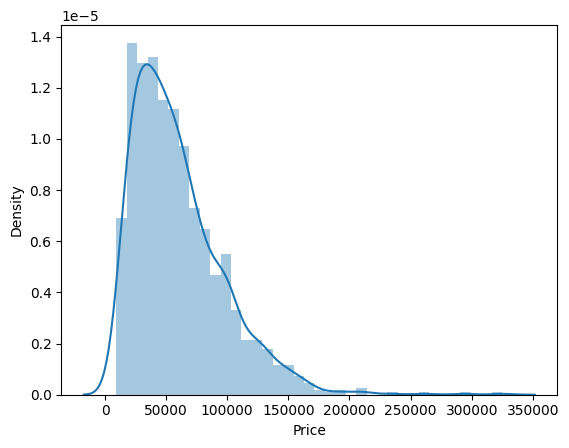

In [15]:
sns.distplot(dataset['Price'])

<Axes: >

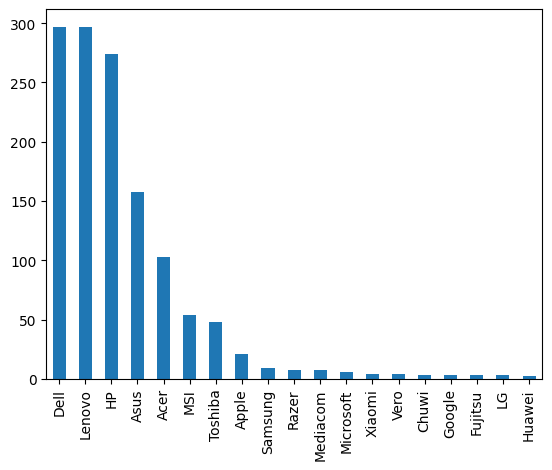

In [16]:
dataset['Company'].value_counts().plot(kind='bar')

In [17]:
new=dataset['ScreenResolution'].str.split('x',n=1,expand=True)

In [18]:
dataset['X_res']=new[0]
dataset['Y_res']=new[1]

In [19]:
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,IPS Panel Retina Display 2560,1600


In [20]:
dataset['X_res']=dataset['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [21]:
dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  X_res             1303 non-null   object 
 12  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), object(9)
memory usage: 122.3+ KB


In [23]:
dataset['X_res']=dataset['X_res'].astype('int')
dataset['Y_res']=dataset['Y_res'].astype('int')

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  X_res             1303 non-null   int64  
 12  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(2), object(7)
memory usage: 122.3+ KB


In [25]:
dataset.corr()['Price']

<ipython-input-25-674c37b12b91>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()['Price']


Inches    0.068197
Ram       0.743007
Weight    0.210370
Price     1.000000
X_res     0.556529
Y_res     0.552809
Name: Price, dtype: float64

In [26]:
dataset['ppi']=(((dataset['X_res']**2) + (dataset['X_res']**2))**0.5/dataset['Inches']).astype('float')

In [27]:
dataset.corr()['Price']

<ipython-input-27-674c37b12b91>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()['Price']


Inches    0.068197
Ram       0.743007
Weight    0.210370
Price     1.000000
X_res     0.556529
Y_res     0.552809
ppi       0.474973
Name: Price, dtype: float64

In [28]:
dataset.drop(columns=['ScreenResolution'],inplace=True)

In [29]:
dataset.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [30]:
dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,272.209528
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,153.117859
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,174.057054
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,264.476303
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,272.209528


In [31]:
dataset['Cpu Name']=dataset['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [32]:
def fetch_processor(text):
  if text== 'Intel Core i7' or text== 'Intel Core i5' or text== 'Intel Core i3':
    return text
  else:
    if text.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else:
        return 'AMD Processor'

In [33]:
dataset['Cpu brand']=dataset['Cpu Name'].apply(fetch_processor)

In [34]:
dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,272.209528,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,153.117859,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,174.057054,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,264.476303,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,272.209528,Intel Core i5,Intel Core i5


In [35]:
import matplotlib.pyplot as plt

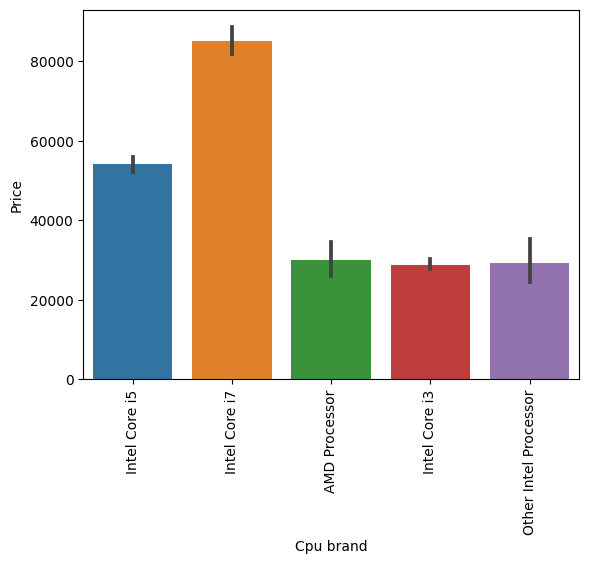

In [36]:
sns.barplot(x=dataset['Cpu brand'],y=dataset['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [37]:
dataset.drop(columns=['Cpu','Cpu Name',],inplace=True)

In [38]:
dataset.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,272.209528,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,153.117859,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,174.057054,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,264.476303,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,272.209528,Intel Core i5


In [39]:
dataset['Memory']=dataset['Memory'].astype(str).replace('\.0', '', regex=True)
dataset['Memory']=dataset['Memory'].str.replace('GB','')
dataset['Memory']=dataset['Memory'].str.replace('TB','000')
new=dataset['Memory'].str.split("+",n=1,expand=True)

dataset['first']=new[0]
dataset['first']=dataset['first'].str.strip()

dataset['second']=new[1]

dataset['Layer1HDD']=dataset["first"].apply(lambda x: 1 if "HDD" in x else 0)
dataset['Layer1SSD']=dataset["first"].apply(lambda x: 1 if "SSD" in x else 0)
dataset['Layer1Hybrid']=dataset["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
dataset['Layer1Flash_Storage']=dataset["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

dataset['first']=dataset['first'].str.replace(r'\D','')

dataset['second'].fillna("0",inplace=True)

dataset['Layer2HDD']=dataset["second"].apply(lambda x: 1 if "HDD" in x else 0)
dataset['Layer2SSD']=dataset["second"].apply(lambda x: 1 if "SSD" in x else 0)
dataset['Layer2Hybrid']=dataset["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
dataset['Layer2Flash_Storage']=dataset["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

dataset['second']=dataset['second'].str.replace(r'\D','')

dataset['first']=dataset['first'].astype(int)
dataset['second']=dataset['second'].astype(int)

dataset['HDD']=(dataset['first']*dataset['Layer1HDD']+dataset['second']*dataset['Layer2HDD'])
dataset['SSD']=(dataset['first']*dataset['Layer1SSD']+dataset['second']*dataset['Layer2SSD'])
dataset['Hybrid']=(dataset['first']*dataset['Layer1Hybrid']+dataset['second']*dataset['Layer2Hybrid'])
dataset['Flash_Storage']=(dataset['first']*dataset['Layer1Flash_Storage']+dataset['second']*dataset['Layer2Flash_Storage'])

dataset.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid',
                      'Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)

<ipython-input-39-00e36501deed>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['first']=dataset['first'].str.replace(r'\D','')
<ipython-input-39-00e36501deed>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['second']=dataset['second'].str.replace(r'\D','')


In [40]:
dataset.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,272.209528,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,153.117859,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,174.057054,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,264.476303,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,272.209528,Intel Core i5,0,256,0,0


In [41]:
dataset.drop(columns=['Memory'],inplace=True)

In [42]:
dataset.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [43]:
dataset.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,272.209528,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,153.117859,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,174.057054,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,264.476303,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,272.209528,Intel Core i5,0,256


In [44]:
dataset['Gpu brand']=dataset['Gpu'].apply(lambda x:x.split()[0])

In [45]:
dataset['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [46]:
dataset=dataset[dataset['Gpu brand'] !='ARM']

In [47]:
dataset.drop(columns=['Gpu'],inplace=True)

In [48]:
def cat_os(inp):
  if inp== 'Windows 10' or inp== 'Windows 7' or inp== 'Windows 10 S':
    return 'Windows'
  else:
    if inp== 'macOS' or 'Mac OS X':
      return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [49]:
dataset['os']=dataset['OpSys'].apply(cat_os)

In [50]:
dataset.drop(columns=['OpSys'],inplace=True)

<ipython-input-51-aa6664222663>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


<Axes: >

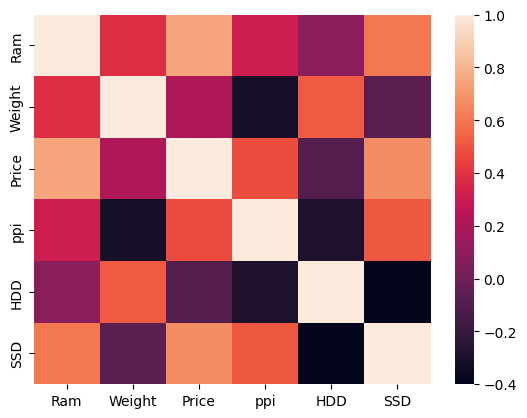

In [51]:
sns.heatmap(dataset.corr())

<ipython-input-52-e1e48af0e627>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(dataset['Price']))


<Axes: xlabel='Price', ylabel='Density'>

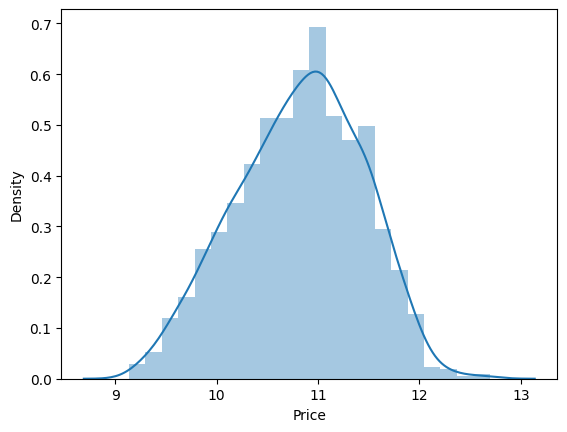

In [52]:
sns.distplot(np.log(dataset['Price']))

In [53]:
X=dataset.drop(columns=['Price'])
y=np.log(dataset['Price'])

In [54]:
X

,Company,TypeName,Ram,Weight,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,272.209528,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,153.117859,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,174.057054,Intel Core i5,0,256,Intel,Mac
3,Apple,Ultrabook,16,1.83,264.476303,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,272.209528,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,193.949289,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,340.261910,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,137.986838,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,123.834341,Intel Core i7,1000,0,AMD,Windows


In [55]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [58]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,5,8,9])
],remainder='passthrough')

step2=LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8076272030239176
MAE 0.20995739979159334


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [59]:
np.exp(0.21)

1.2336780599567432

In [60]:
dataset.head(1)

,Company,TypeName,Ram,Weight,Price,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,272.209528,Intel Core i5,0,128,Intel,Mac


In [61]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,5,8,9])
],remainder='passthrough')

step2=Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8142956093694348
MAE 0.2094501865201661


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [62]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,5,8,9])
],remainder='passthrough')

step2=Ridge(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8076316141226788
MAE 0.20995622645443268


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [63]:
#Random Forest
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,5,8,9])
],remainder='passthrough')

step2=RandomForestRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.881769735468681
MAE 0.16476819685404118


In [64]:
import pickle
pickle.dump(dataset,open('dataset.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [65]:
X_train

,Company,TypeName,Ram,Weight,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,123.834341,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,174.057054,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,166.535838,Other Intel Processor,0,0,Intel,Mac
1020,Dell,2 in 1 Convertible,4,2.08,174.057054,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,174.057054,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,123.834341,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,174.057054,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,123.834341,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,123.834341,Intel Core i3,2000,0,Nvidia,Mac


In [66]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.7 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1


In [67]:
!pip install streamlit -q

In [68]:
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.7/698.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.1.0-py3-none-any.whl size=20583 sha256=cb0a8b177c62aab18d1a2de8a687f6d7e105c49e653ad28564eff818fac64bd1
  Stored in directory: /root/.cache/pip/wheels/d8/2d/7a/97a039fca211fa789bffad50ff97dca13c01e9b83e8879f503
Successfully built pyngrok


In [69]:
%%writefile myapp.py
import streamlit as st
import pickle
import numpy as np
import pandas as pd  # Add this import for dataset loading

pipe = pickle.load(open('pipe.pkl', 'rb'))


with open('dataset.pkl', 'rb') as file:
    dataset = pickle.load(file)

st.title("Laptop Price Predictor")

Company = st.selectbox('Brand', dataset['Company'].unique())
type = st.selectbox('Type', dataset['TypeName'].unique())
ram = st.selectbox('RAM(in GB)', [2, 4, 6, 8, 12, 16, 24])
weight = st.number_input('Weight of the laptop')
screen_size = st.number_input('Screen Size')
resolution = st.selectbox('Screen Resolution', ['1920x1080', '1366x768', '1600x900', '3840x2160', '3200x1800', '2880x1800', '2560x1600', '2560x1440', '2304x1440'])
cpu = st.selectbox('CPU', dataset['Cpu brand'].unique())
hdd = st.selectbox('HDD(in GB)', [0, 128, 256, 512, 1024])
ssd = st.selectbox('SSD(in GB)', [0, 8, 128, 256, 512, 1024])
gpu = st.selectbox('GPU', dataset['Gpu brand'].unique())
os = st.selectbox('OS', dataset['os'].unique())

if st.button('Predict Price'):
    ppi = None
    X_res = int(resolution.split('x')[0])
    Y_res = int(resolution.split('x')[1])
    ppi = ((X_res**2) + (Y_res**2))**0.5 / screen_size
    query = np.array([Company, type, ram, weight,screen_size, cpu, hdd, ssd, gpu, os])

    query = query.reshape(1, 10)
    st.title("The predicted Price of this configuration is " + str(int(np.exp(pipe.predict(query)[0]))))


Writing myapp.py


In [70]:
!wget -q -O - ipv4.icanhazip.com

34.23.57.63


In [71]:
!streamlit run myapp.py & npx localtunnel --port 8501

[..................] - rollbackFailedOptional: verb npm-session 531b485bb6c1faf

npx: installed 22 in 8.078s
your url is: https://some-wombats-train.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.57.63:8501

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
  Stopping...
^C
